Intro to NN

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UVADS/DS1001/blob/master/ddsbook/NN_intro2.ipynb)

GG - gg5d

 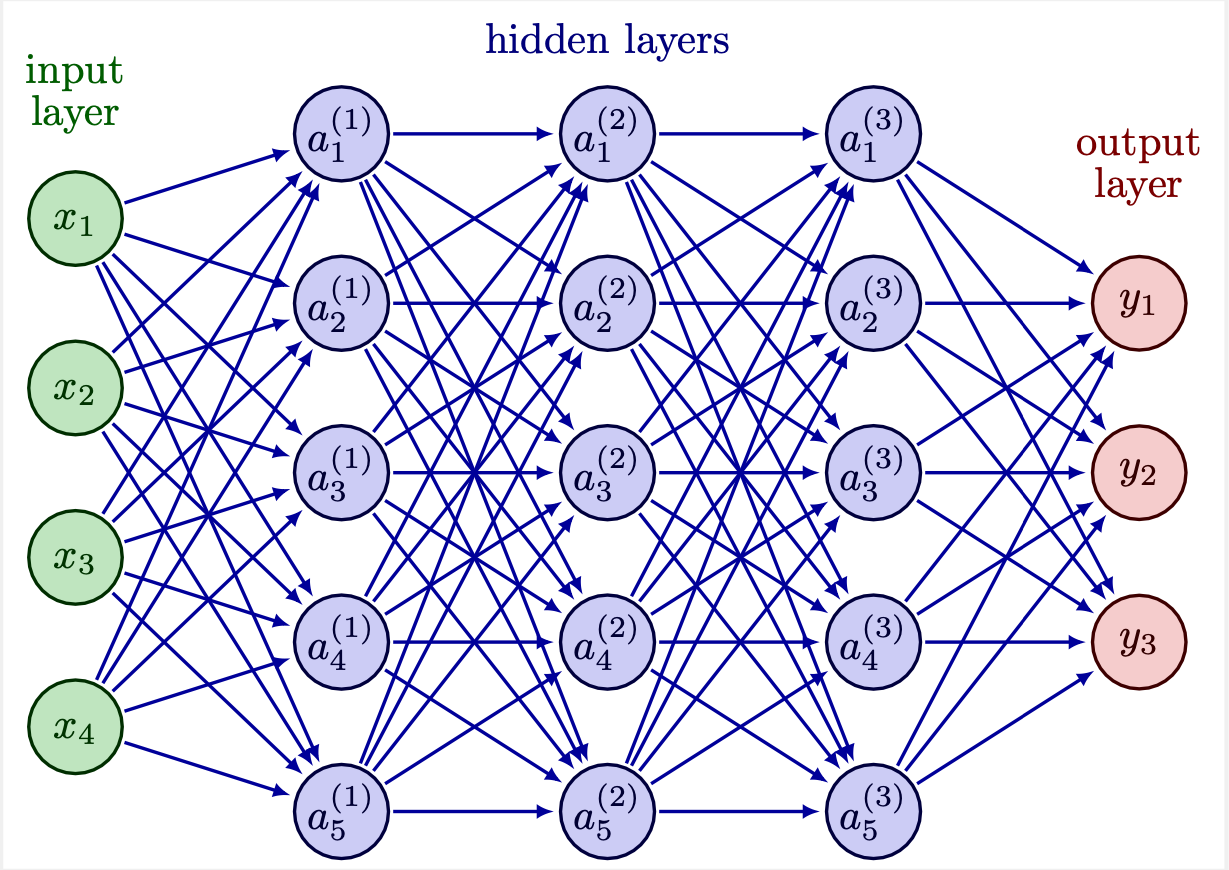

Let's be a little bit formal

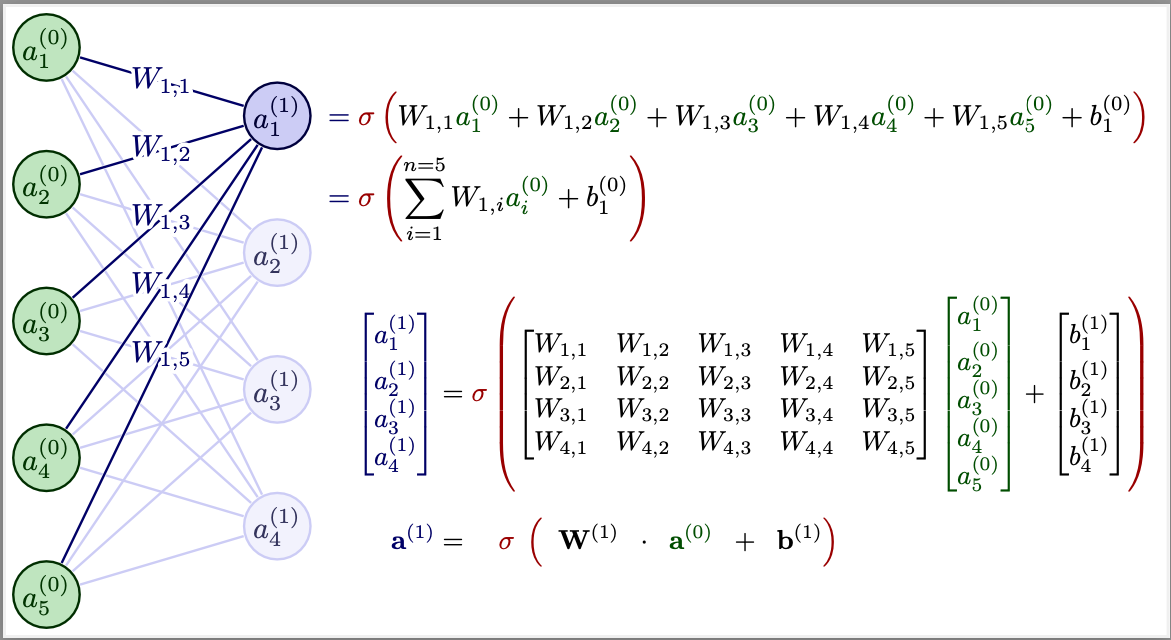 

We are going to play with a real NN

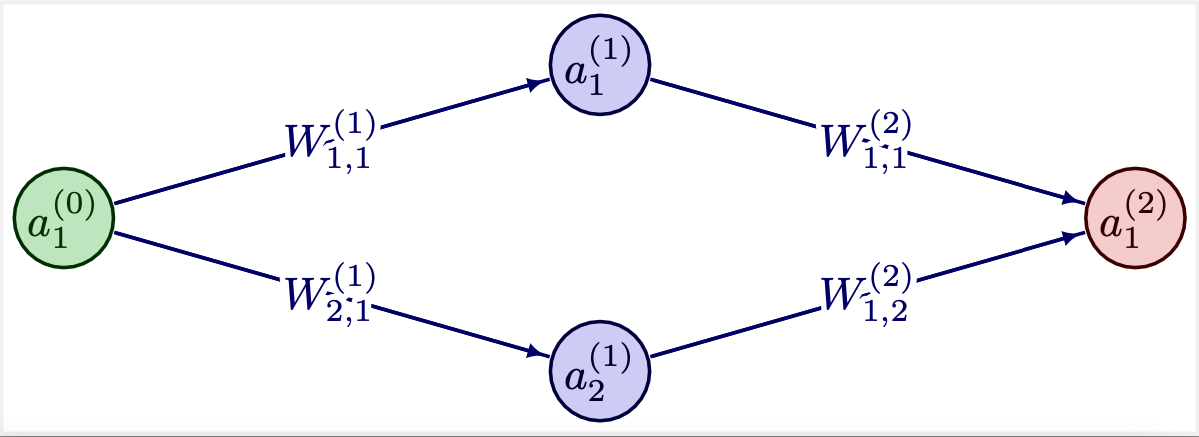

In Machine Learning, the process of going from the green input to the red output is called FORWARD PROPAGATION, the same process, in Mathematics, is called a FUNCTION.

Based on the matrix formulas outlined above, we are going to write the forward propagation in details for the NN(1,2,1): one node as input layer, 2 nodes as hidden layer, and one node as output layer

There are 7 parameters in this model, 4 W's and 3 b's.

Let's start with the first half

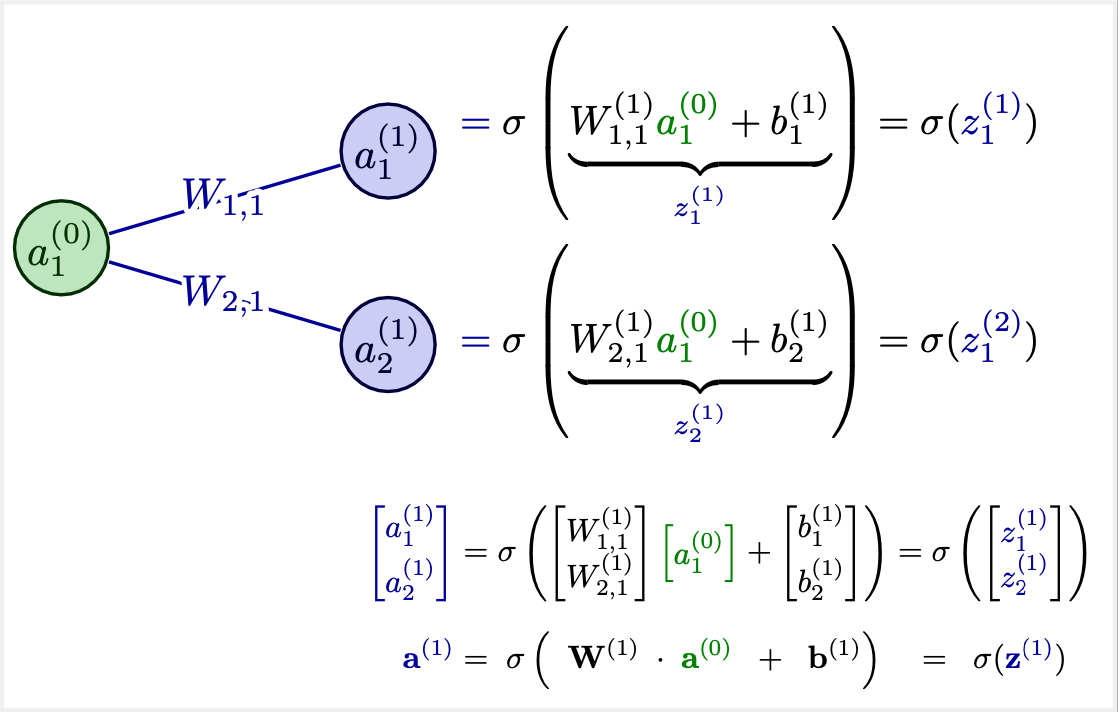

Now the second half

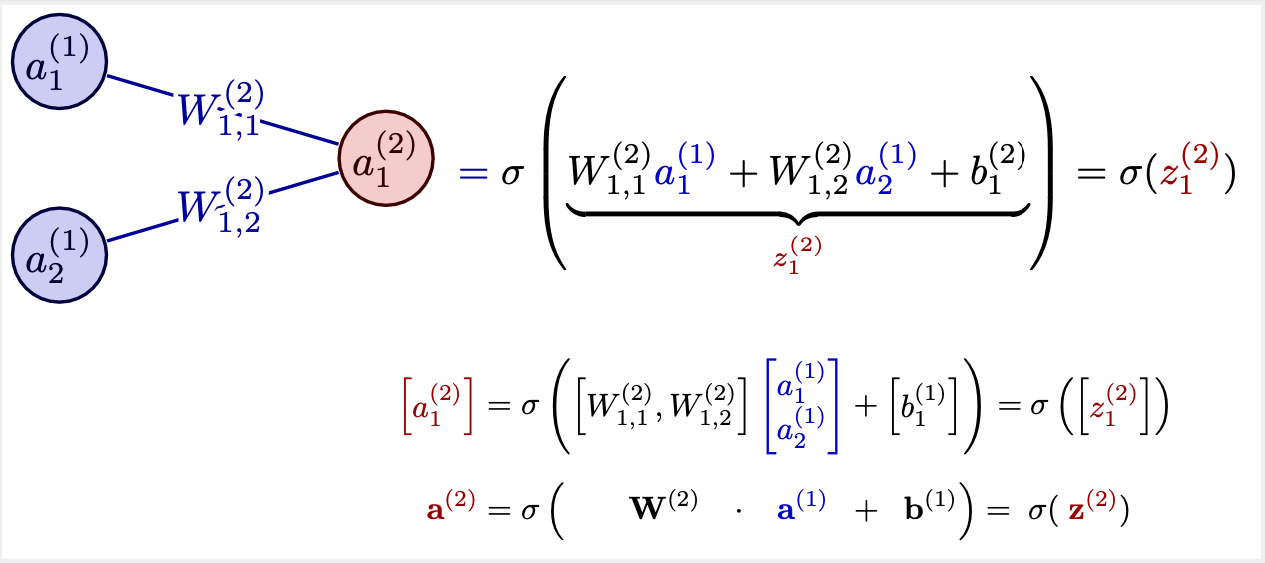

Now, we are going to put the two halves together

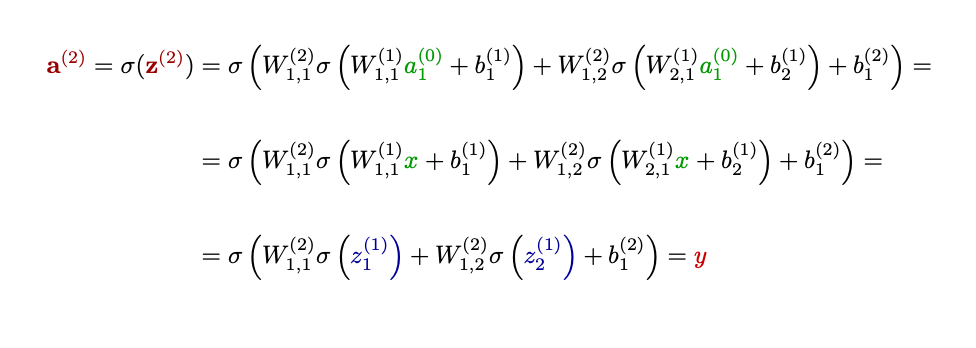

Enough Math, lets do some coding and implement the NN. We will generate the forward propagation function. Look at the second row as the best reference for the code.

Some imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define the number of input, hidden, and output nodes
input_nodes = 1
hidden_nodes = 2
output_nodes = 1

Define the **activation** function **$\mathbf{\sigma(x)}$**, and its derivative

In [5]:
def sigma(x):
    return x*(x>0)               # ReLU
#    return 1 / (1 + np.exp(-x)) # sigmoid

# Define the derivative of the activation function
def sigma_derivative(x):
    return 1*(x>0)
#    return sigma(x) * (1 - sigma(x))

Define the **forward propagation** function

In [6]:
# Define the forward propagation function
def forward_propagation(x):
    z1 = np.dot(W1, x) + b1
    a1 = sigma(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigma(z2)
    return a1, a2


For convenience, we also define a range of values for x, and a function to evaluate the output y for each of them

In [7]:
X = np.linspace(start=-1, stop=2,num=100)

def output(X):
    outp = np.array([])
    for j in range(X.shape[0]):
        x = X[j].reshape(input_nodes, 1)
        a1, a2 = forward_propagation(x)
        outp = np.append(outp,a2)
    return outp

Now, let's try the NN for some choice of the parameters W's and b'.


Initialize weights $W$ and biases $b$ (close to the actual values)

In [8]:
# 
W1 = np.array([[1.5],[1.5]]) # np.random.randn(hidden_nodes, input_nodes)
b1 = np.array([[0.8],[-.5]]) # np.zeros((hidden_nodes, 1))
W2 = np.array([[1.0,-2.4]]) #np.random.randn(output_nodes, hidden_nodes)
b2 = np.array([[1.0]]) #np.zeros((output_nodes, 1))

Let's plot the output of the NN, $y$ vs $x$

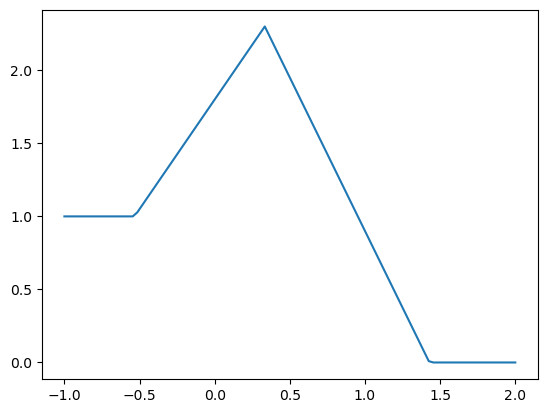

In [9]:
X = np.linspace(start=-1, stop=2,num=100)
Y = output(X)
plt.plot(X,Y, label="NN")

With the following choice of the parameters, we get a triangular function

In [10]:
#
W1 = np.array([[1.0],[1.0]]) # np.random.randn(hidden_nodes, input_nodes)
b1 = np.array([[0.0],[-.5]]) # np.zeros((hidden_nodes, 1))
W2 = np.array([[2.0,-4.0]]) #np.random.randn(output_nodes, hidden_nodes)
b2 = np.array([[0.0]]) #np.zeros((output_nodes, 1))

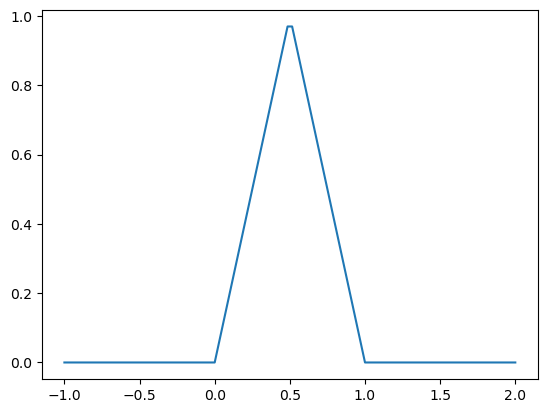

In [11]:
X = np.linspace(start=-1, stop=2,num=100)
Y = output(X)
plt.plot(X,Y, label="NN")

The triangular function can also be defined as:

In [12]:
def tri(x):
    return 2*x*(x>0)*(x<.5)+(2-2*x)*(x>=.5)*(x<1)

and plotted

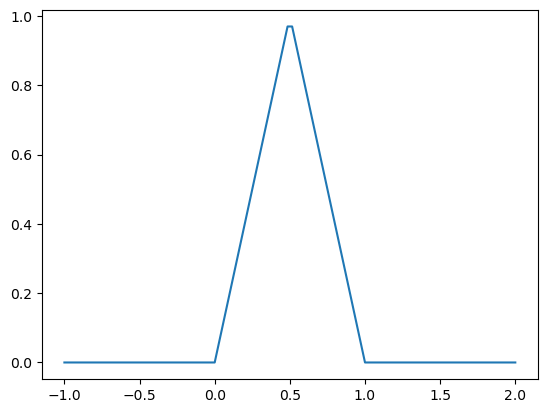

In [13]:
y =tri(X) 

plt.plot(X,y)

As a matter of fact, there is a theorem that says: a NN with one hidden layer with n-nodes and ReLU activations can generate all piecewise linear continuous functions with at most n+1 breakpoints.  

BIG QUESTION: If we do not know the correct values of $W$ and $b$, how do we determine the parameters W's and b' that would give us the triangular function?

We would be happy if the output $y$ were close in value to $f(x)$. Let's measure this *"closeness"* with a function:

COST FUNCTION

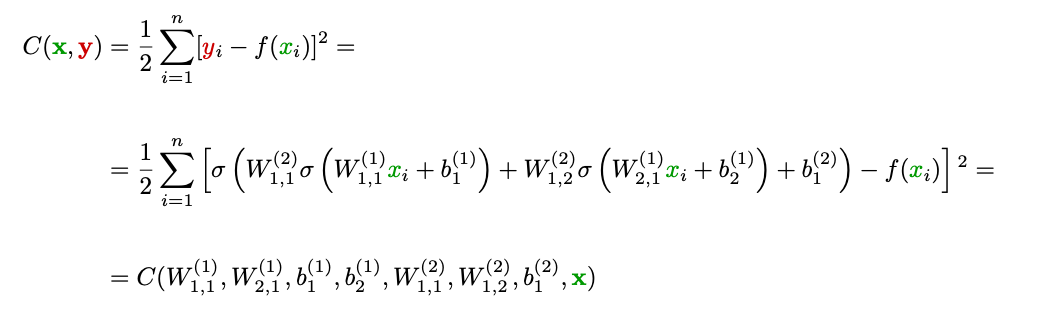

IMPORTANT FACT:  The output $y$ of the NN is a function of x, but also of W's and b's. 

GOAL:  find values of W's and b's that would *minimize* the Cost function

First STEP: since we have no clue, we start with random or otherwise chosen values

ALGORITHM: we use an idea by Newton to modify the parameters W's and b's.
We will keep repeating it until we are happy with the reult.

I am going to show you on the board as the algorithm works in one dimension, for higher dimensions it is called **Gradiant Descent***
https://en.wikipedia.org/wiki/Gradient_descent

For the gradient/partial derivatives we need a lot of derivatives [CHAIN RULE], here they are:

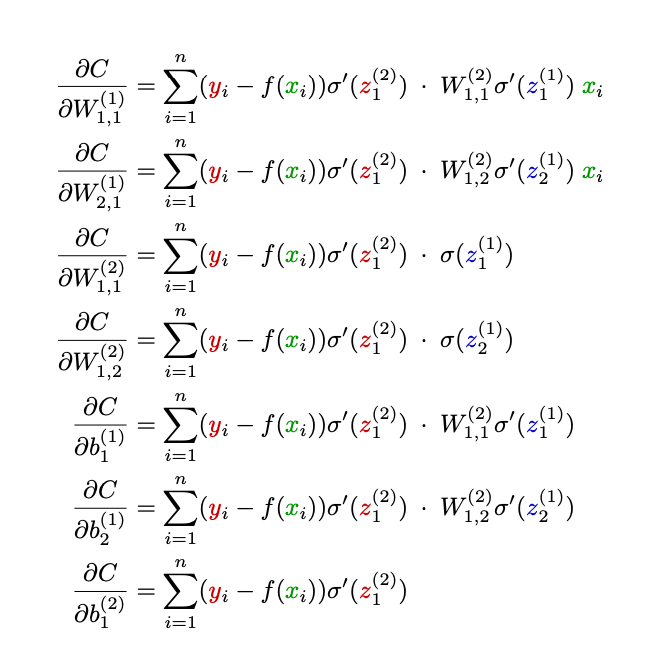

In one iteration, each parameter will be modified as follows:

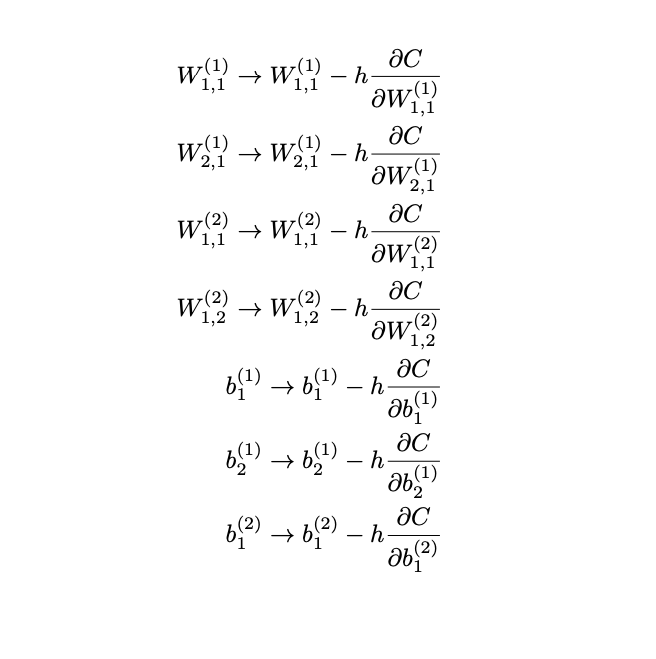

$h$ is called *learning rate*.

This algorithm is called **backpropagation**. This is an implementation in python

In [14]:
# Define the cost function
def cost_function(y, y_hat):
    return 0.5 * np.sum((y - y_hat)**2)

# Define the backpropagation function
def backpropagation(x, y, a1, a2):
    delta2 = (a2 - y) * sigma_derivative(a2)
    dW2 = np.dot(delta2, a1.T)
    db2 = delta2
    delta1 = np.dot(W2.T, delta2) * sigma_derivative(a1)
    dW1 = np.dot(delta1, x.T)
    db1 = delta1
    return dW1, db1, dW2, db2

Let's run the backpropagation

In [21]:
# Initialize weights and biases close to the actual values
W1 = np.random.randn(hidden_nodes, input_nodes) #np.array([[1.5],[1.5]]) 
b1 = np.array([[0.8],[-.5]]) # np.zeros((hidden_nodes, 1))
W2 = np.array([[1.0,-2.4]]) #np.random.randn(output_nodes, hidden_nodes)
b2 = np.array([[1.0]]) #np.zeros((output_nodes, 1))


In [24]:


#%% Define the learning rate and number of iterations
learning_rate = 0.1
num_iterations = 1000

# Perform gradient descent
for i in range(num_iterations):
    # Initialize the gradients
    dW1 = np.zeros_like(W1)
    db1 = np.zeros_like(b1)
    dW2 = np.zeros_like(W2)
    db2 = np.zeros_like(b2)

    # Compute the gradients for each sample
    for j in range(X.shape[0]):
        x = X[j].reshape(input_nodes, 1)
        y_true = y[j].reshape(output_nodes, 1)

        # Forward propagation
        a1, a2 = forward_propagation(x)

        # Compute the cost
        cost = cost_function(y_true, a2)

        # Backpropagation
        dW1_j, db1_j, dW2_j, db2_j = backpropagation(x, y_true, a1, a2)

        # Accumulate the gradients
        dW1 += dW1_j
        db1 += db1_j
        dW2 += dW2_j
        db2 += db2_j

    # Average the gradients over all samples
    dW1 /= X.shape[0]
    db1 /= X.shape[0]
    dW2 /= X.shape[0]
    db2 /= X.shape[0]

    # Update the weights and biases
    W1 -= learning_rate*dW1
    b1 -= learning_rate*db1
    W2 -= learning_rate*dW2
    b2 -= learning_rate*db2



Let's see what we got:

In [25]:
print(W1,b1,W2,b2)

[[-1.26183051]
 [-1.4780345 ]] [[1.30442732]
 [0.71975326]] [[ 1.38185546 -2.47473216]] [[0.00062049]]


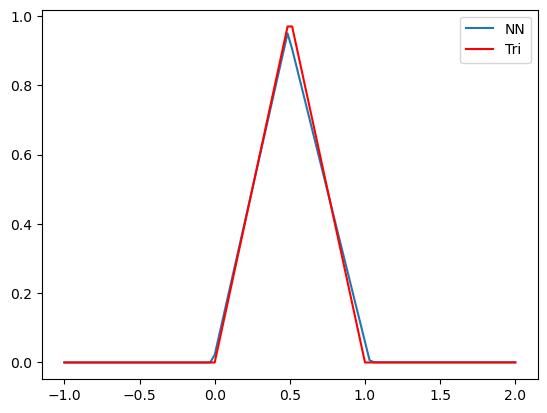

In [26]:
Y = output(X)
plt.plot(X,Y, label="NN")
plt.plot(X,y, color='r', label="Tri")
plt.legend()